1.	Average GPA by Class: What is the average GPA for each class? 

In [43]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf


In [44]:
data=pd.read_csv("project 4 data.csv")

In [45]:
data.head(10) #for checking values are exists or not

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y,class.1,GPA.1,ID.1
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0,A,73.47,1141
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0,A,71.22,1142
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1,A,74.56,1143
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0,A,72.89,1144
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0,A,70.11,1145
5,1146,A,male,3,65.04,60,60,39,61,65,74,60,F,B,C,0,0,A,65.04,1146
6,1147,A,male,4,77.11,60,43,52,63,71,72,75,G,A,A,0,1,A,77.11,1147
7,1148,A,female,5,64.75,60,38,60,63,70,68,51,H,B,C,0,0,A,64.75,1148
8,1149,B,female,5,77.92,61,60,66,68,80,78,71,I,B,A,0,0,B,77.92,1149
9,1150,A,female,5,76.50,60,61,60,69,73,60,62,H,B,A,0,0,A,76.50,1150


In [46]:
data.info() #checking information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [47]:
data.isnull().any().sum() #Is there any null value or not
data.isnull().any()


ID                     False
class                  False
gender                 False
race                   False
GPA                    False
Algebra                False
Calculus1              False
Calculus2              False
Statistics             False
Probability            False
Measure                False
Functional_analysis    False
from1                  False
from2                  False
from3                  False
from4                  False
y                      False
class.1                False
GPA.1                  False
ID.1                   False
dtype: bool

In [48]:
data.dropna(inplace=True) #deleting all duplicate row with values

In [49]:
duplicates=data[data.duplicated()]
duplicates
#display duplicates rows
if not duplicates.empty:
    print("Duplicates not found")
    print(duplicates)
else:
    print("Not found.")


Not found.


In [50]:
data.head() 

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y,class.1,GPA.1,ID.1
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0,A,73.47,1141
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0,A,71.22,1142
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1,A,74.56,1143
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0,A,72.89,1144
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0,A,70.11,1145


In [51]:
import pandas as pd

# Assuming 'data' is in our DataFrame loaded from a CSV file
try:
    print(type(data))
except NameError:
    print("The variable 'data' is not defined.")


<class 'pandas.core.frame.DataFrame'>


In [52]:
data.head()  # again display the first few rows of the DataFrame

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y,class.1,GPA.1,ID.1
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0,A,73.47,1141
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0,A,71.22,1142
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1,A,74.56,1143
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0,A,72.89,1144
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0,A,70.11,1145


In [53]:
print(data.columns)  #seeing columns

Index(['ID', 'class', 'gender', 'race', 'GPA', 'Algebra', 'Calculus1',
       'Calculus2', 'Statistics', 'Probability', 'Measure',
       'Functional_analysis', 'from1', 'from2', 'from3', 'from4', 'y',
       'class.1', 'GPA.1', 'ID.1'],
      dtype='object')


In [54]:
# Group the data by class and calculate the average GPA for each class
average_gpa_by_class = data.groupby('class')['GPA'].mean().reset_index()

# Display the results
print(average_gpa_by_class)


  class        GPA
0     A  82.844605
1     B  83.251724


2.	Gender Performance Comparison: How do male and female students compare in terms of average GPA?

In [55]:
# Calculate average GPA for male and female students
avg_gpa_by_gender = data.groupby('gender')['GPA'].mean()

# Print the results
print("Average GPA for Male Students:", avg_gpa_by_gender['male'])
print("Average GPA for Female Students:", avg_gpa_by_gender['female'])


Average GPA for Male Students: 81.85216216216217
Average GPA for Female Students: 83.55823529411765


3.	Race Performance Analysis: What is the average GPA for students of different races? 

In [56]:
# Calculate the average GPA for students of different races
avg_gpa_by_race = data.groupby('race')['GPA'].mean()

print(avg_gpa_by_race)

race
1    83.909012
2    80.156667
3    81.388333
4    78.897500
5    73.400000
6    83.955000
7    81.592000
Name: GPA, dtype: float64


4.	Course Performance: How do students perform in different courses (Algebra, Calculus1, Calculus2, Statistics, Probability, Measure, Functional_analysis)? 

In [57]:
# Calculate statistics for each course
statistics = {}
courses = ["Algebra", "Calculus1", "Calculus2", "Statistics", "Probability", "Measure", "Functional_analysis"]

for course in courses:
    statistics[course] = {
        'mean': data[course].mean(),
        'median': data[course].median(),
        'std': data[course].std()
    }

# Display the statistics
for course, stats in statistics.items():
    print(f"{course} - Mean: {stats['mean']}, Median: {stats['median']}, Standard Deviation: {stats['std']}")


Algebra - Mean: 76.05714285714286, Median: 76.0, Standard Deviation: 11.722618317585036
Calculus1 - Mean: 71.96190476190476, Median: 73.0, Standard Deviation: 12.197039213176515
Calculus2 - Mean: 78.94285714285714, Median: 83.0, Standard Deviation: 14.997325768942282
Statistics - Mean: 85.13333333333334, Median: 87.0, Standard Deviation: 10.269509263485793
Probability - Mean: 83.87619047619047, Median: 85.0, Standard Deviation: 10.51436310490709
Measure - Mean: 80.76190476190476, Median: 81.0, Standard Deviation: 10.296119330120122
Functional_analysis - Mean: 75.32380952380953, Median: 76.0, Standard Deviation: 13.003324455170949


5.	Correlation with GPA: What is the correlation between GPA and performance in individual courses?

In [58]:
import pandas as pd

# Load the data
data = pd.read_csv("project 4 data.csv")

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

print(correlation_matrix)


                           ID      race       GPA   Algebra  Calculus1  \
ID                   1.000000 -0.199560  0.688738  0.751647   0.502151   
race                -0.199560  1.000000 -0.246571 -0.249298  -0.192550   
GPA                  0.688738 -0.246571  1.000000  0.761590   0.660560   
Algebra              0.751647 -0.249298  0.761590  1.000000   0.608083   
Calculus1            0.502151 -0.192550  0.660560  0.608083   1.000000   
Calculus2            0.610048 -0.173228  0.803865  0.640578   0.588929   
Statistics           0.925148 -0.179594  0.740903  0.759595   0.547605   
Probability          0.627886 -0.229312  0.732898  0.752480   0.484766   
Measure              0.635982 -0.186478  0.758676  0.755499   0.471347   
Functional_analysis  0.464508 -0.102435  0.809451  0.572575   0.430825   
from4               -0.112189 -0.154352 -0.052361 -0.078426   0.034589   
y                    0.319634  0.011883  0.292536  0.257051   0.125429   
GPA.1                0.688738 -0.24657

6.	Performance Distribution: What is the distribution of GPAs across all students? 

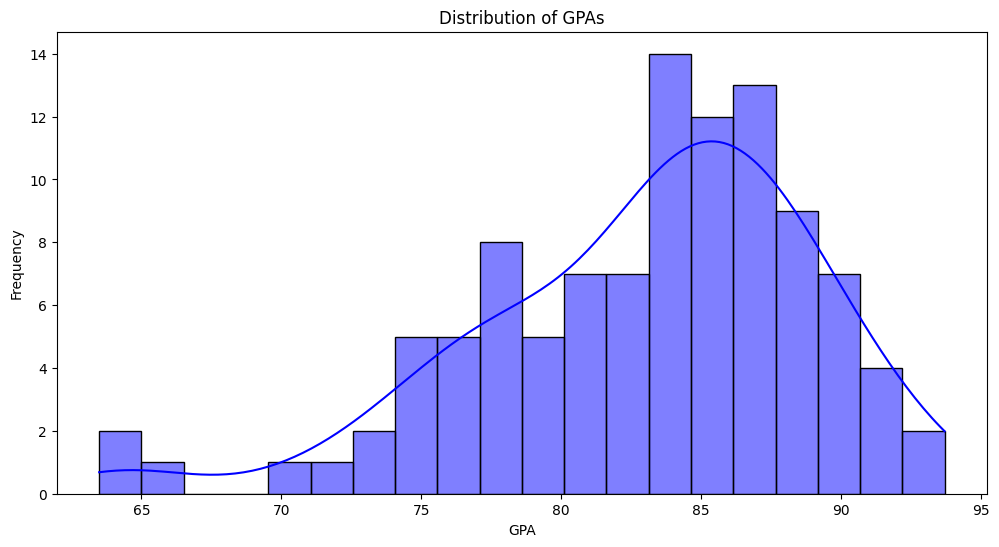

C:\Users\TAEEFA\AppData\Local\Temp\ipykernel_11288\2226359182.py:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




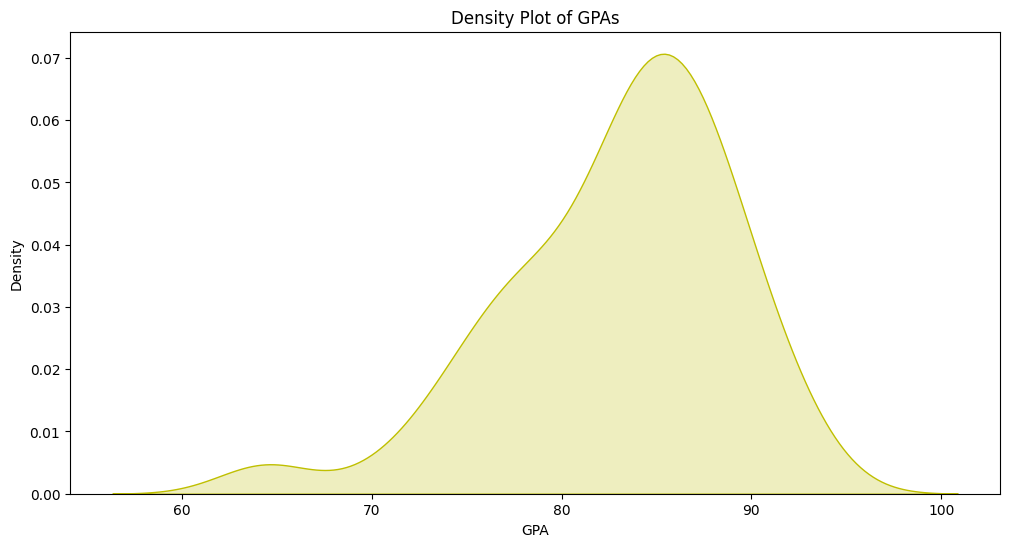

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("project 4 data.csv")

# Create a histogram of GPAs
plt.figure(figsize=(12, 6))
sns.histplot(data['GPA'], kde=True, bins=20, color='b')
plt.title('Distribution of GPAs')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

# Create a density plot of GPAs
plt.figure(figsize=(12, 6))
sns.kdeplot(data['GPA'], shade=True, color='y')
plt.title('Density Plot of GPAs')
plt.xlabel('GPA')
plt.ylabel('Density')
plt.show()


7. Top Performers: Who are the top 10 students in terms of GPA? 

In [60]:
# Top Performers:  Who are the top 10 students in terms of GPA? 
# Sort the data by GPA in descending order
top_performers = data.sort_values(by='GPA', ascending=False)

# Select the top 10 students
top_10_students = top_performers.head(10)

# Print the top 10 students
print("Top 10 Students in terms of GPA:")
print(top_10_students)


Top 10 Students in terms of GPA:
       ID class  gender  race    GPA  Algebra  Calculus1  Calculus2  \
104  1245     A    male     1  93.71       93         97         99   
68   1209     A  female     1  93.06       82         90         93   
75   1216     A  female     1  91.90       95         86         96   
96   1237     A    male     2  91.74       94        100         96   
93   1234     A  female     1  91.61       93         82         95   
97   1238     A    male     1  91.14       98         90         98   
41   1182     B  female     1  90.66       88         78         95   
84   1225     A  female     1  90.62       94         81         90   
98   1239     A    male     1  90.31       84         82         99   
79   1220     A  female     3  89.95       87         87         92   

     Statistics  Probability  Measure  Functional_analysis from1 from2 from3  \
104         100           97       90                   90     K     B     A   
68           91          

8. Course Difficulty: Which courses have the lowest average scores, indicating higher difficulty? 

Average scores for each course:
Algebra                76.057143
Calculus1              71.961905
Calculus2              78.942857
Statistics             85.133333
Probability            83.876190
Measure                80.761905
Functional_analysis    75.323810
dtype: float64

Courses with the lowest average scores:
Calculus1              71.961905
Functional_analysis    75.323810
Algebra                76.057143
dtype: float64


C:\Users\TAEEFA\AppData\Local\Temp\ipykernel_11288\2503692797.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




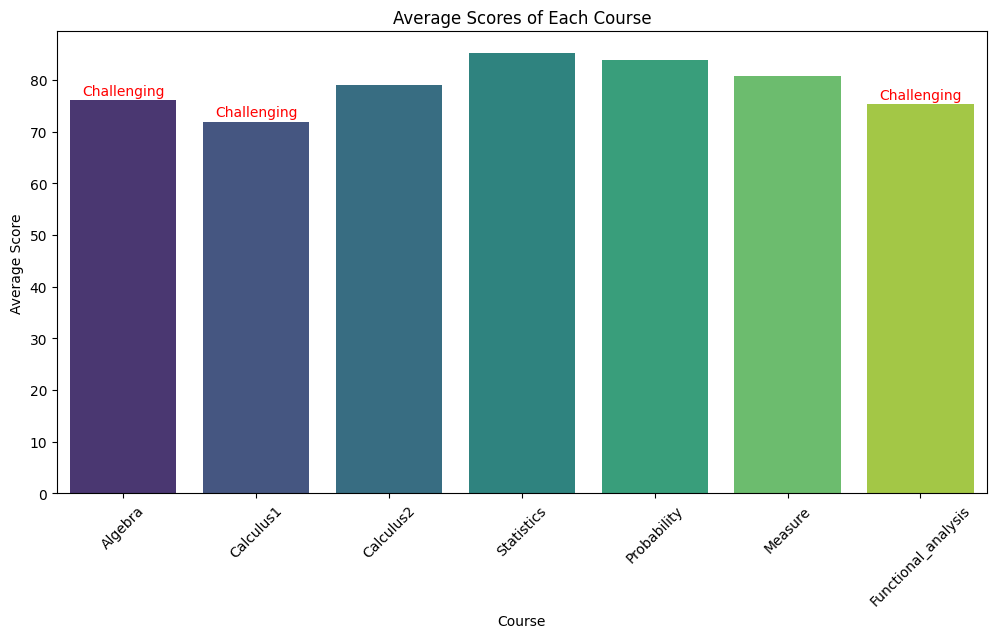

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("project 4 data.csv")

# List of course score columns
course_columns = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Calculate the average scores for each course
average_scores = data[course_columns].mean()

# Print the average scores
print("Average scores for each course:")
print(average_scores)

# Find the courses with the lowest average scores
lowest_avg_scores = average_scores.nsmallest(3)  # Adjust the number if you want more or fewer courses

# Print the courses with the lowest average scores
print("\nCourses with the lowest average scores:")
print(lowest_avg_scores)

# Create a bar chart of the average scores
plt.figure(figsize=(12, 6))
sns.barplot(x=average_scores.index, y=average_scores.values, palette='viridis')

# Highlight the courses with the lowest average scores
for index, value in enumerate(average_scores):
    if value in lowest_avg_scores.values:
        plt.text(index, value + 1, 'Challenging', color='red', ha='center')

plt.title('Average Scores of Each Course')
plt.xlabel('Course')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


9. Impact of From Columns: How do the 'from1', 'from2', 'from3', and 'from4' columns impact the GPA? 

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Regression analysis for 'from4'
X = data[['from4']]
y = data['GPA']
X = sm.add_constant(X)
reg_model = sm.OLS(y, X).fit()
reg_summary = reg_model.summary()

# ANOVA for 'from1', 'from2', 'from3'
anova_results = {}
for col in ['from1', 'from2', 'from3']:
    model = ols(f'GPA ~ C({col})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[col] = anova_table

reg_summary, anova_results


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    GPA   R-squared:                       0.003
 Model:                            OLS   Adj. R-squared:                 -0.007
 Method:                 Least Squares   F-statistic:                    0.2832
 Date:                Tue, 04 Jun 2024   Prob (F-statistic):              0.596
 Time:                        12:40:28   Log-Likelihood:                -337.40
 No. Observations:                 105   AIC:                             678.8
 Df Residuals:                     103   BIC:                             684.1
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

10. Predictive Analysis: Can we predict the 'y' value based on GPA and course scores?

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('project 4 data.csv')

# Prepare the feature matrix X (GPA and course scores) and target vector y ('y')
X = df[['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']]
y = df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model with increased maximum iterations
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6190476190476191


Visualization Questions 
1.	GPA Distribution: Create a histogram showing the distribution of GPAs.


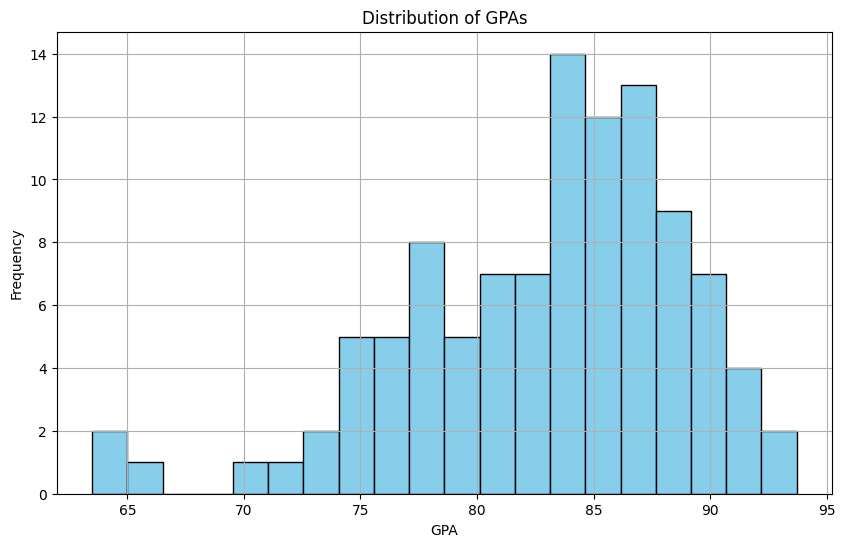

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

   # Data including
data = pd.read_csv("project 4 data.csv")

# Create DataFrame
data = pd.DataFrame(data)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data['GPA'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of GPAs')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


2.	Average GPA by Gender: Create a bar chart comparing average GPA between male and female students.

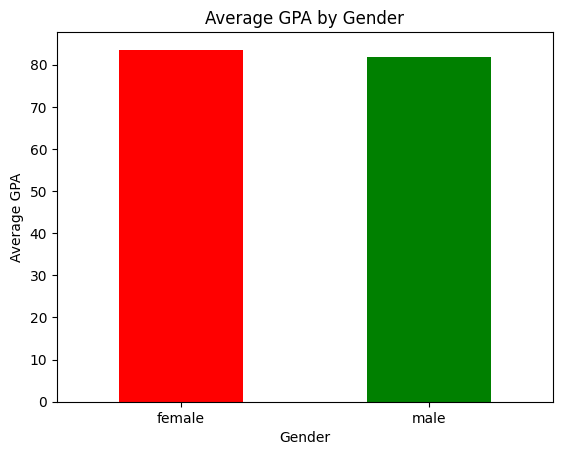

In [65]:
avg_gpa_by_gender.plot(kind='bar', color=['red', 'green'])
plt.title('Average GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


3.	Average GPA by Race: Create a bar chart comparing average GPA across different races. 

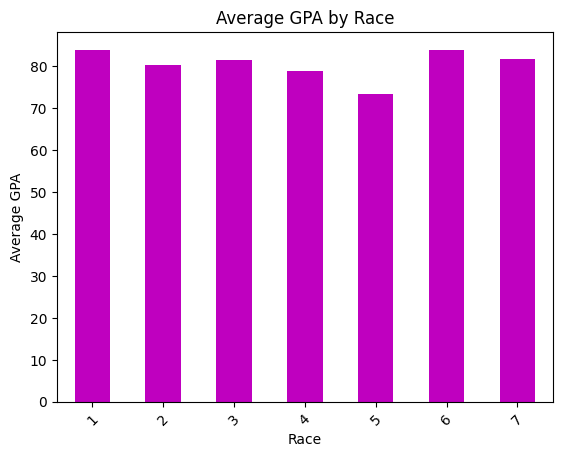

In [66]:
avg_gpa_by_race = data.groupby('race')['GPA'].mean()
avg_gpa_by_race.plot(kind='bar', color='m')
plt.title('Average GPA by Race')
plt.xlabel('Race')
plt.ylabel('Average GPA')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


4. Course Score Trends: Create line charts for the average scores in Algebra, Calculus1, Calculus2, Statistics, Probability, Measure, and Functional_analysis. 

Algebra - Mean: 76.05714285714286, Median: 76.0, Standard Deviation: 11.722618317585036
Calculus1 - Mean: 71.96190476190476, Median: 73.0, Standard Deviation: 12.197039213176515
Calculus2 - Mean: 78.94285714285714, Median: 83.0, Standard Deviation: 14.997325768942282
Statistics - Mean: 85.13333333333334, Median: 87.0, Standard Deviation: 10.269509263485793
Probability - Mean: 83.87619047619047, Median: 85.0, Standard Deviation: 10.51436310490709
Measure - Mean: 80.76190476190476, Median: 81.0, Standard Deviation: 10.296119330120122
Functional_analysis - Mean: 75.32380952380953, Median: 76.0, Standard Deviation: 13.003324455170949


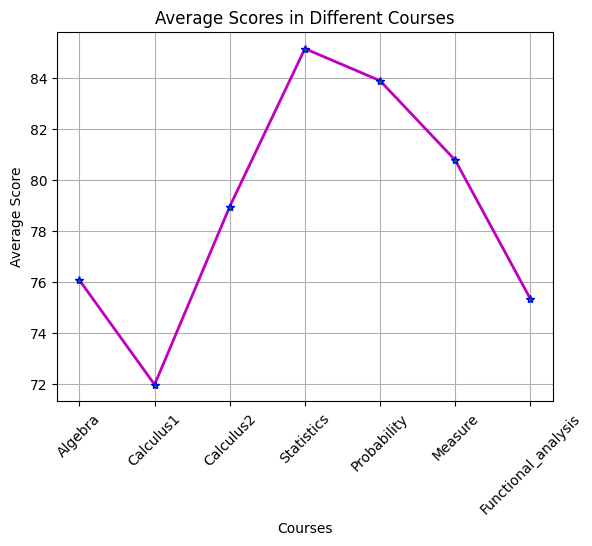

In [67]:
# Importing necessary libraries
import matplotlib.pyplot as plt
statistics = {}
courses = ["Algebra", "Calculus1", "Calculus2", "Statistics", "Probability", "Measure", "Functional_analysis"]

for course in courses:
    statistics[course] = {
        'mean': data[course].mean(),
        'median': data[course].median(),
        'std': data[course].std()
    }

# Display the statistics
for course, stats in statistics.items():
    print(f"{course} - Mean: {stats['mean']}, Median: {stats['median']}, Standard Deviation: {stats['std']}")

# Calculate average scores for each course
average_scores = data[courses].mean()

# Plotting
average_scores.plot(kind='line', color='m',marker='*',mfc='g',mec='b',linewidth='2')
plt.title('Average Scores in Different Courses')
plt.xlabel('Courses')
plt.ylabel('Average Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()


5.Correlation Heatmap: Create a heatmap to visualize the correlation matrix of GPA and course scores.

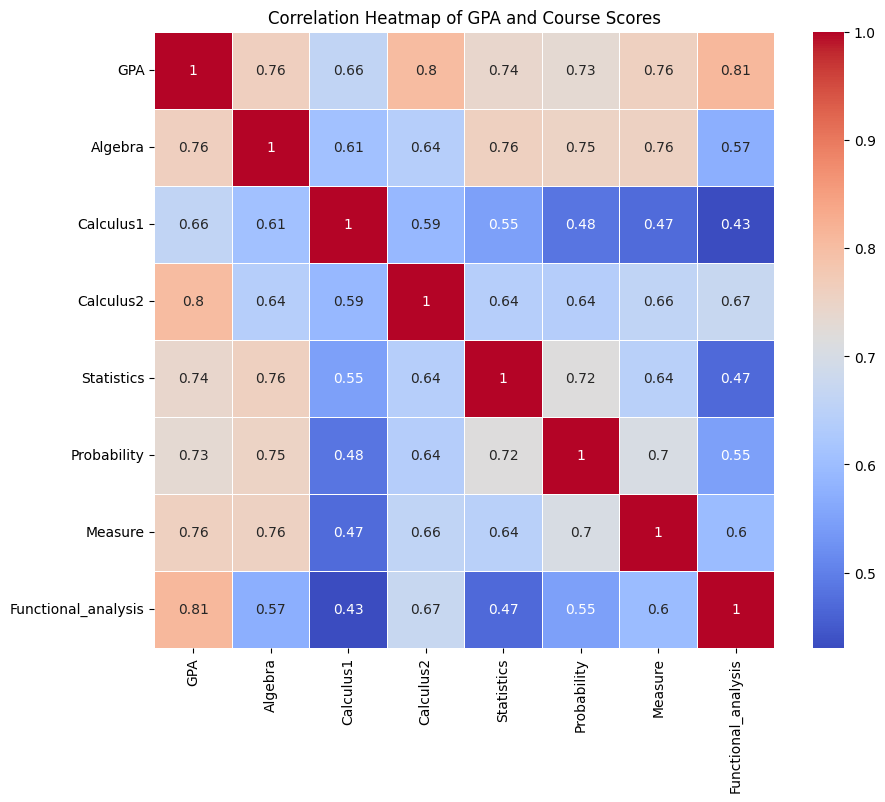

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("project 4 data.csv")

# Select columns related to GPA and course scores
columns_of_interest = ['GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']
data_selected = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of GPA and Course Scores')
plt.show()

 6. Box Plot of GPA by Class: Create a box plot to show the distribution of GPAs for each class. 

C:\Users\TAEEFA\AppData\Local\Temp\ipykernel_11288\1862375376.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




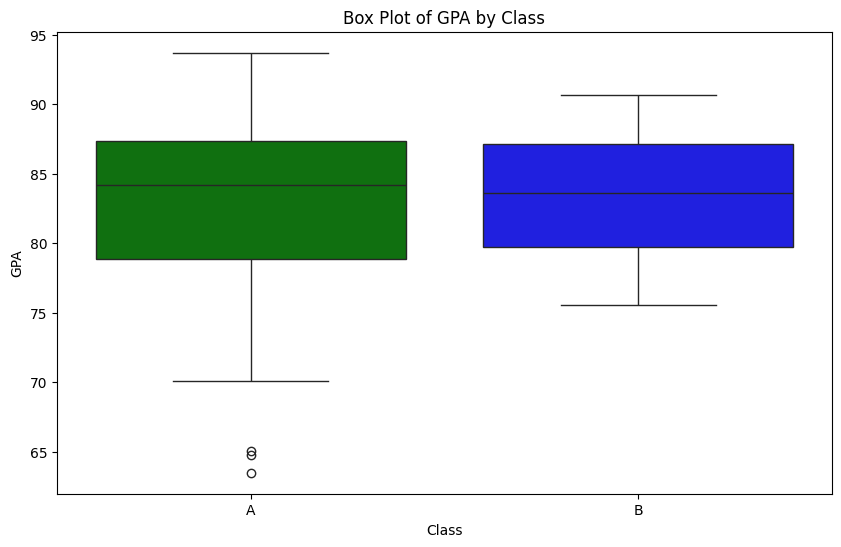

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("project 4 data.csv")

# Create a box plot with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='GPA', data=data, palette=['g', 'b'])
plt.title('Box Plot of GPA by Class')
plt.xlabel('Class')
plt.ylabel('GPA')
plt.show()



7.	Scatter Plot of GPA vs. Course Scores: Create scatter plots to show the relationship between GPA and each course score. 

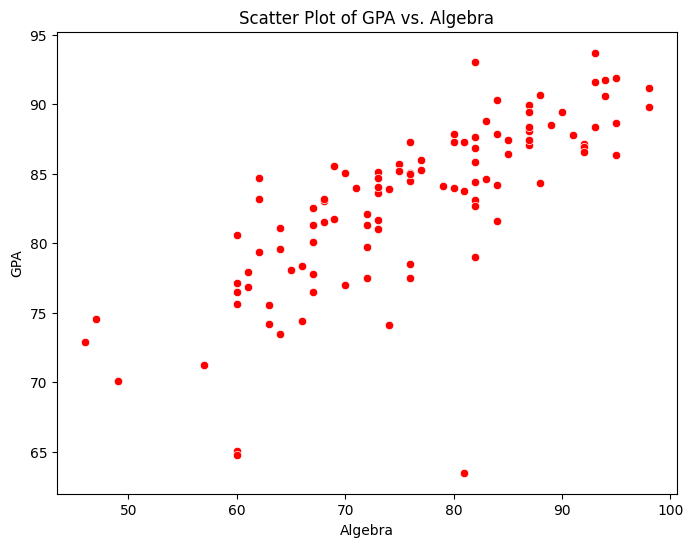

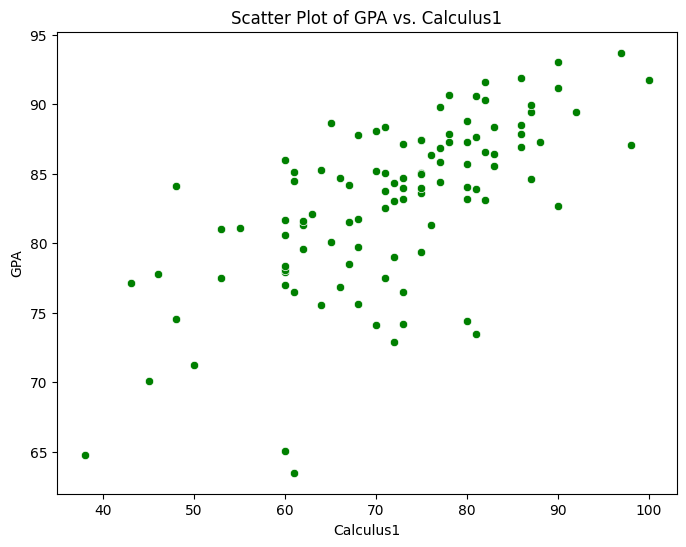

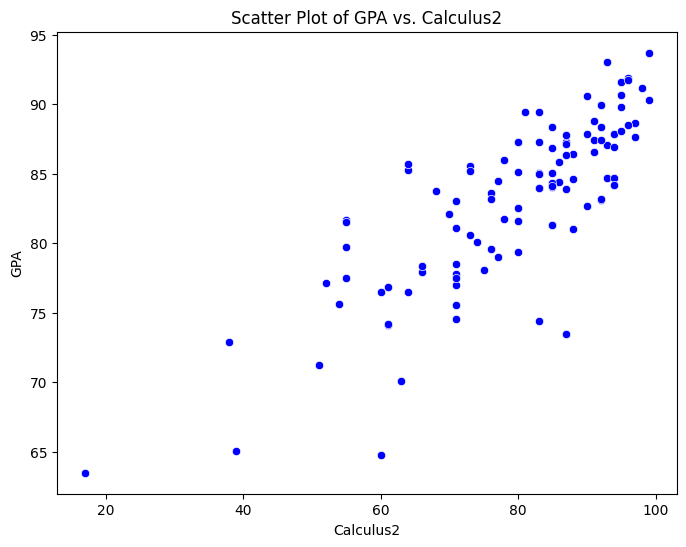

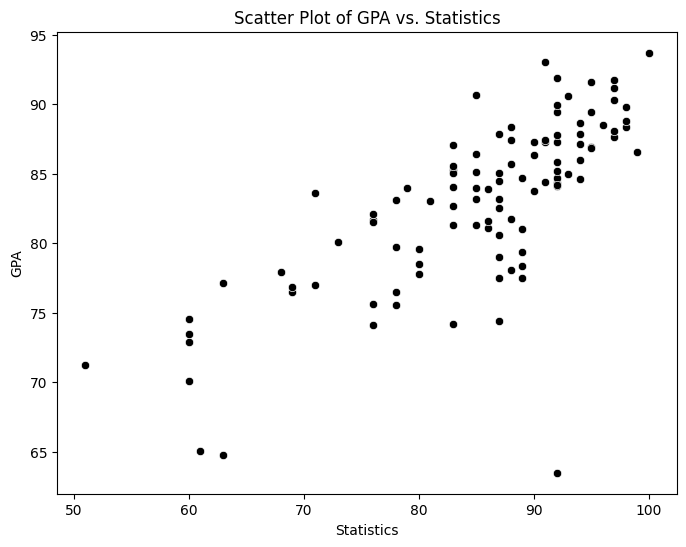

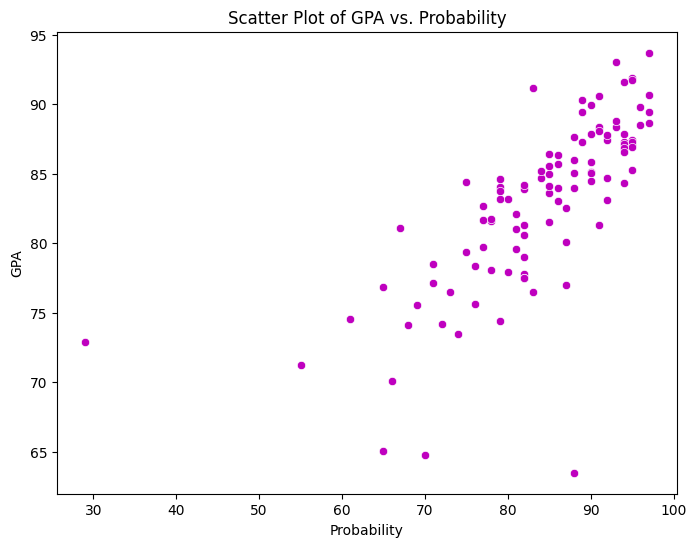

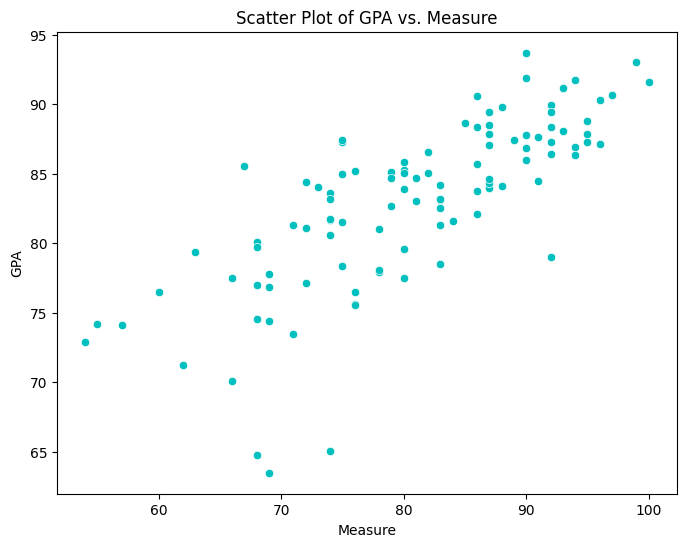

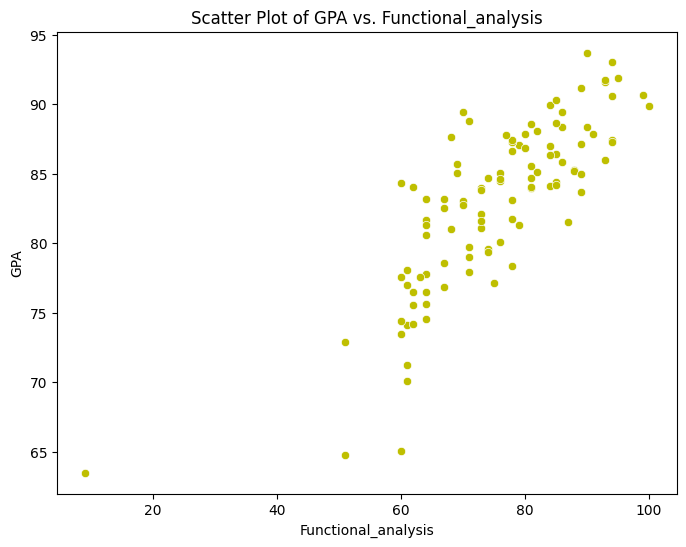

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("project 4 data.csv")

# List of course score columns
course_columns = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# List of colors to use
colors = ['r', 'g', 'b', 'k', 'm', 'c', 'y']

# Create scatter plots for each course score vs GPA
for course, color in zip(course_columns, colors):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=course, y='GPA', data=data, color=color)
    plt.title(f'Scatter Plot of GPA vs. {course}')
    plt.xlabel(course)
    plt.ylabel('GPA')
    plt.show()


8.	Course Difficulty: Create a bar chart to show the average scores of each course, highlighting the most challenging courses. 

C:\Users\TAEEFA\AppData\Local\Temp\ipykernel_11288\2369617.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




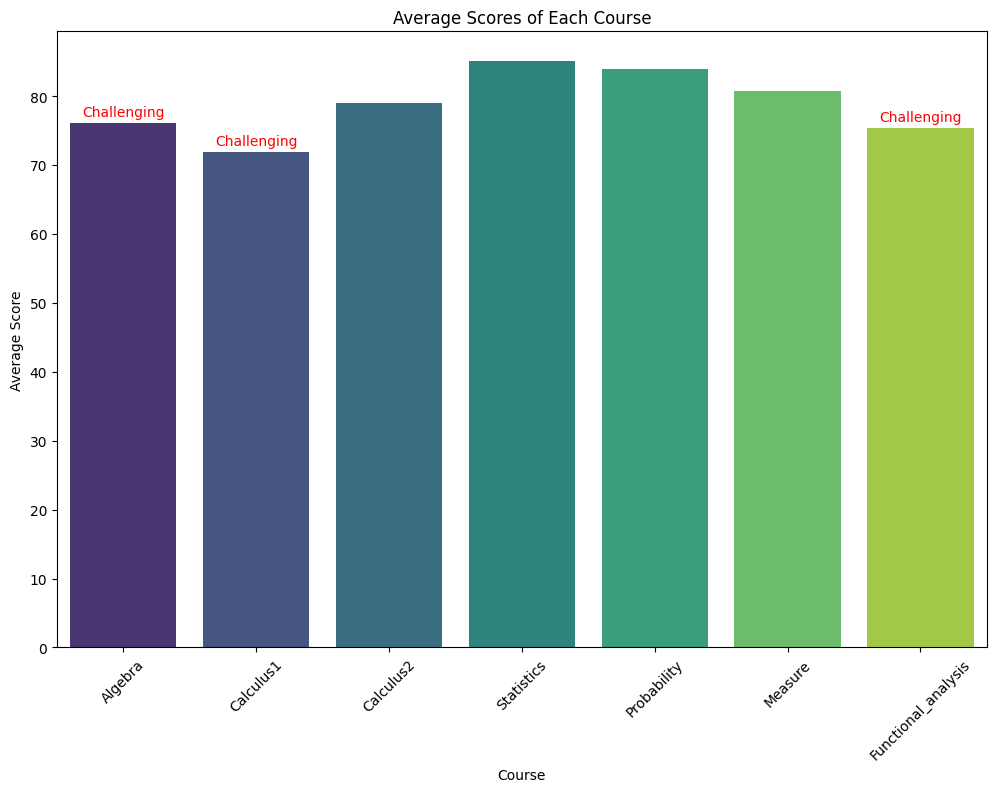

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("project 4 data.csv")

# List of course score columns
course_columns = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# Calculate the average scores for each course
average_scores = data[course_columns].mean()

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=average_scores.index, y=average_scores.values, palette='viridis')

# Highlight the most challenging courses
# Assuming the most challenging courses are those with the lowest average scores
threshold = average_scores.mean()
for index, value in enumerate(average_scores):
    if value < threshold:
        plt.text(index, value + 1, 'Challenging', color='red', ha='center')

    plt.title('Average Scores of Each Course')
    plt.xlabel('Course')
    plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


9.	Impact of 'From' Columns: Create a series of box plots to show the impact of 'from1', 'from2', 'from3', and 'from4' on GPA.

C:\Users\TAEEFA\AppData\Local\Temp\ipykernel_11288\3929248098.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\TAEEFA\AppData\Local\Temp\ipykernel_11288\3929248098.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\TAEEFA\AppData\Local\Temp\ipykernel_11288\3929248098.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\TAEEFA\AppData\Local\Temp\ipykernel_11288\3929248098.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the

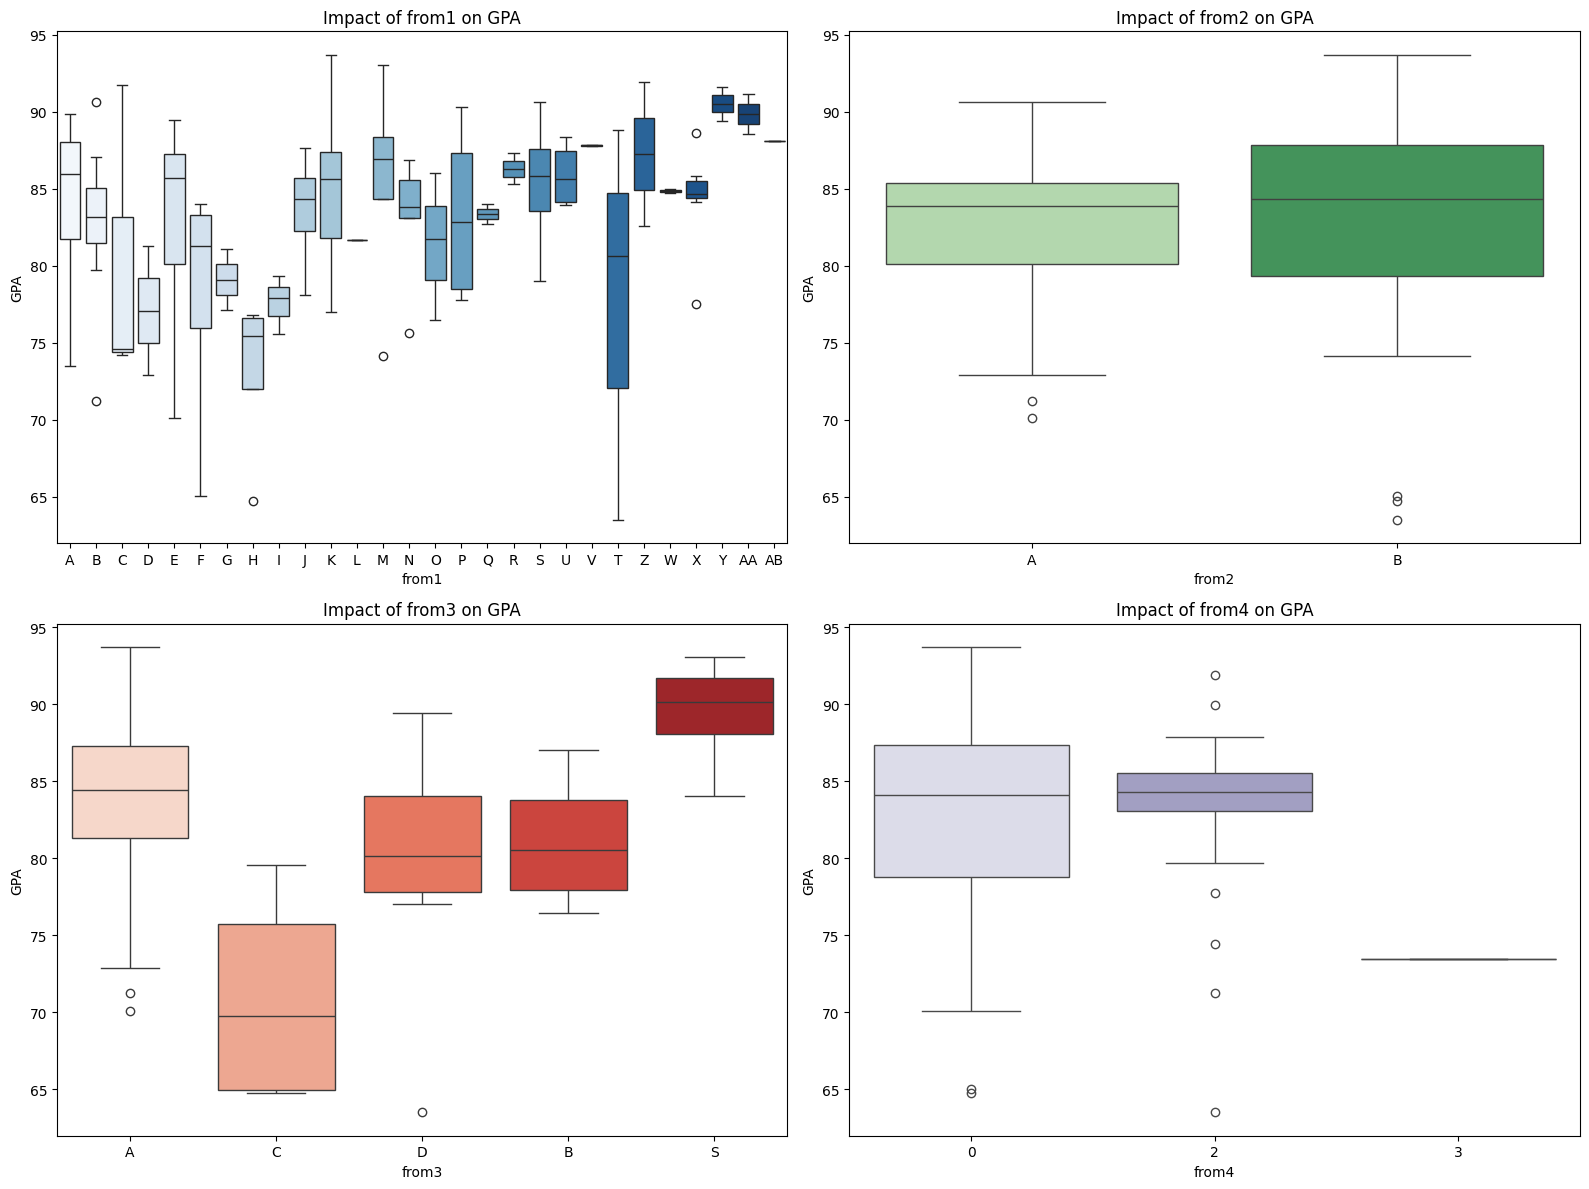

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   # Load the data
data = pd.read_csv("project 4 data.csv")

# List of 'from' columns
from_columns = ['from1', 'from2', 'from3', 'from4']

# List of colors to use for the box plots
colors = ['Blues', 'Greens', 'Reds', 'Purples']

# Create a box plot for each 'from' column with different colors
plt.figure(figsize=(16, 12))
for i, (from_col, color) in enumerate(zip(from_columns, colors), start=1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.boxplot(x=from_col, y='GPA', data=data, palette=color)
    plt.title(f'Impact of {from_col} on GPA')
    plt.xlabel(from_col)
    plt.ylabel('GPA')

plt.tight_layout()
plt.show()



10.	correlation matrix of the data set.

In [73]:
import pandas as pd 

# Load the data
data = pd.read_csv("project 4 data.csv")

 # Select only numeric columns 
numeric_data = data.select_dtypes(include=['number']) 

# Calculate the correlation matrix correlation_matrix = numeric_data.corr() 
print(correlation_matrix)


                          GPA   Algebra  Calculus1  Calculus2  Statistics  \
GPA                  1.000000  0.761590   0.660560   0.803865    0.740903   
Algebra              0.761590  1.000000   0.608083   0.640578    0.759595   
Calculus1            0.660560  0.608083   1.000000   0.588929    0.547605   
Calculus2            0.803865  0.640578   0.588929   1.000000    0.640908   
Statistics           0.740903  0.759595   0.547605   0.640908    1.000000   
Probability          0.732898  0.752480   0.484766   0.638694    0.716918   
Measure              0.758676  0.755499   0.471347   0.658728    0.644505   
Functional_analysis  0.809451  0.572575   0.430825   0.672529    0.469362   

                     Probability   Measure  Functional_analysis  
GPA                     0.732898  0.758676             0.809451  
Algebra                 0.752480  0.755499             0.572575  
Calculus1               0.484766  0.471347             0.430825  
Calculus2               0.638694  0.658728